In [2]:
import sys, os  
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPool2D, BatchNormalization,AveragePooling2D  
from keras.losses import categorical_crossentropy 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam  

In [3]:
df=pd.read_csv('fer2013.csv')

In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [6]:
df.value_counts(['Usage']) 

Usage      
Training       28709
PrivateTest     3589
PublicTest      3589
dtype: int64

In [7]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

E:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


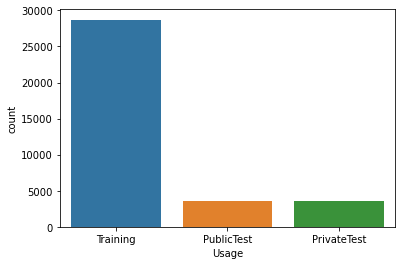

In [8]:
sns.countplot(df['Usage'])
plt.show()

E:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


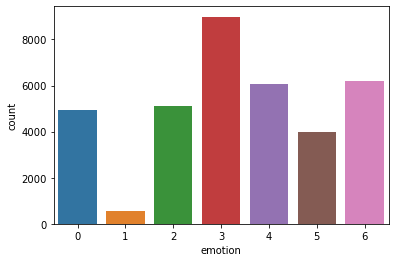

In [9]:
sns.countplot(df['emotion'])
plt.show()

In [10]:
#label the emotions
emotion_label = {0:'anger', 1:'disgust', 2:'fear', 3:'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

In [11]:
X=[]
y=[]
for index, row in df.iterrows():
    pixels=np.asarray(list(row['pixels'].split(' ')),dtype='uint8')
    img = pixels.reshape((48,48))
    X.append(img)
    y.append(row['emotion'])
#X

In [12]:
X[0]

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]], dtype=uint8)

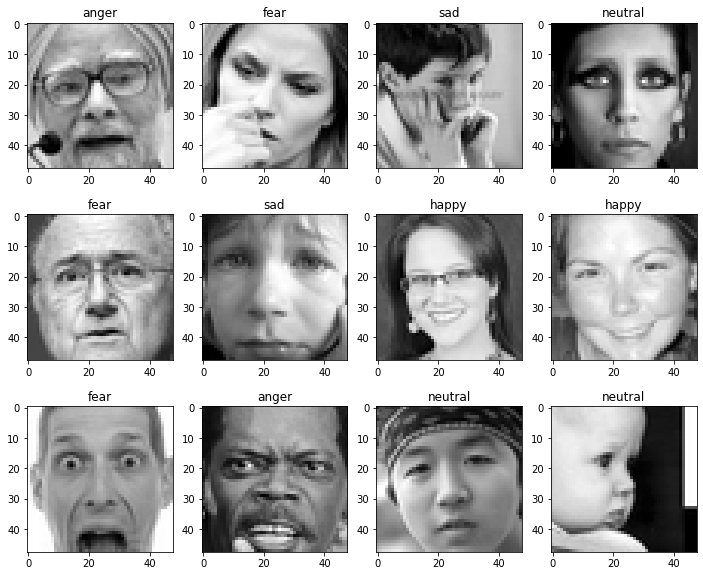

In [13]:
plt.figure(2, figsize=(12,10))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(X[i],cmap='gray')
    plt.title(emotion_label[y[i]])
    
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                                    test_size=0.3)


In [15]:
y_train=to_categorical(y_train, num_classes=7)  
y_test=to_categorical(y_test, num_classes=7)  

In [16]:
X_train = np.array(X_train,'float32')  
y_train = np.array(y_train,'float32')  
X_test = np.array(X_test,'float32')  
y_test = np.array(y_test,'float32')  

In [17]:
input_shape = (48, 48, 1)

# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)
# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(25120, 48, 48, 1)
(10767, 48, 48, 1)


In [18]:
model = Sequential()  
#1st convolution laye  
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))  
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))  
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5))  
  
#2nd convolution layer  
model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5))  
  
#3rd convolution layer  
model.add(Conv2D(128, (3, 3), activation='relu'))  
model.add(Conv2D(128, (3, 3), activation='relu'))  
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))  
  
model.add(Flatten())  
  
#fully connected neural networks  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  
  
model.add(Dense(7, activation='softmax'))  

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0

In [20]:
model.compile(loss=categorical_crossentropy,  
              optimizer=Adam(),  
              metrics=['accuracy']) 

In [21]:
early_stop= EarlyStopping(monitor='loss', patience=3)

In [22]:
history=model.fit(X_train_resized, y_train,  
          batch_size=64,  
          epochs=25,  
          verbose=1,  
          validation_data=(X_test_resized, y_test),
          callbacks=early_stop,
          shuffle=True)

Epoch 1/25
393/393 [==============================] - 233s 594ms/step - loss: 1.8188 - accuracy: 0.2452 - val_loss: 1.8099 - val_accuracy: 0.2546
Epoch 2/25
393/393 [==============================] - 234s 594ms/step - loss: 1.8141 - accuracy: 0.2487 - val_loss: 1.8040 - val_accuracy: 0.2548
Epoch 3/25
393/393 [==============================] - 226s 574ms/step - loss: 1.7614 - accuracy: 0.2704 - val_loss: 1.6880 - val_accuracy: 0.3215
Epoch 4/25
393/393 [==============================] - 225s 573ms/step - loss: 1.6536 - accuracy: 0.3360 - val_loss: 1.6119 - val_accuracy: 0.3605
Epoch 5/25
393/393 [==============================] - 224s 570ms/step - loss: 1.5731 - accuracy: 0.3803 - val_loss: 1.5012 - val_accuracy: 0.4162
Epoch 6/25
393/393 [==============================] - 224s 570ms/step - loss: 1.5130 - accuracy: 0.4119 - val_loss: 1.4681 - val_accuracy: 0.4276
Epoch 7/25
393/393 [==============================] - 224s 570ms/step - loss: 1.4604 - accuracy: 0.4327 - val_loss: 1.4057 -

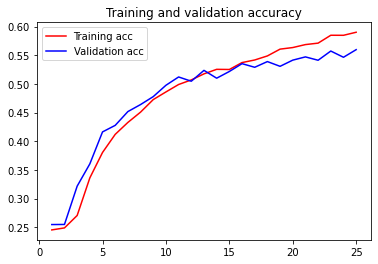

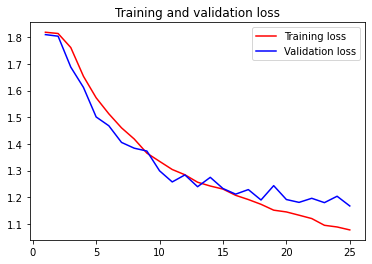

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [24]:
#Saving the  model to  use it later on  
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer.h5")